In [162]:
import pandas as pd
import numpy as np

In [163]:
data = pd.read_csv('features.csv')
df_feat = pd.DataFrame(data)

In [164]:
df_feat.head(10)

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13
0,1,0,01,NaN,2.0,505,NaN,M,7.0,M,1,C,280.0,1.0
1,1,0,02,NaN,2.0,803,1.0,M,9.0,M,4,B,275.0,1.0
2,1,0,02,NaN,4.0,623,1.0,M,9.0,M,2,A,280.0,2.0
3,1,0,01,NaN,3.0,505,1.0,M,6.0,M,1,B,275.0,1.0
4,1,0,70,NaN,2.0,505,1.0,M,7.0,M,1,B,NaN,1.0
5,1,0,13,NaN,1.0,508,1.0,M,6.0,M,1,B,205.0,1.0
6,1,0,00,NaN,2.0,505,1.0,M,7.0,M,1,C,225.0,1.0
7,1,0,22,NaN,2.0,659,NaN,M,7.0,M,2,NaN,255.0,1.0
8,1,0,01,NaN,3.0,510,1.0,M,9.0,M,1,B,195.0,1.0
9,1,0,01,1.0,1.0,505,1.0,M,7.0,M,1,B,155.0,1.0


In [165]:
print(df_feat.shape)

df_feat.info()

(187239, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187239 entries, 0 to 187238
Data columns (total 14 columns):
label         187239 non-null int64
feature_1     187239 non-null int64
feature_2     187239 non-null object
feature_3     20787 non-null float64
feature_4     128888 non-null float64
feature_5     187239 non-null int64
feature_6     148114 non-null float64
feature_7     187239 non-null object
feature_8     184000 non-null float64
feature_9     157368 non-null object
feature_10    187239 non-null int64
feature_11    154193 non-null object
feature_12    163232 non-null float64
feature_13    184770 non-null float64
dtypes: float64(6), int64(4), object(4)
memory usage: 20.0+ MB


In [166]:
df_feat.describe()

,label,feature_1,feature_3,feature_4,feature_5,feature_6,feature_8,feature_10,feature_12,feature_13
count,187239.000000,187239.000000,20787.0,128888.000000,187239.000000,148114.0,184000.000000,187239.000000,163232.000000,184770.000000
mean,0.504494,0.206276,1.0,2.395809,597.601616,1.0,6.474348,1.800432,231.970815,1.361812
std,0.499981,0.754156,0.0,0.986957,103.792273,0.0,1.825297,1.317445,68.913656,0.480526
min,0.000000,0.000000,1.0,1.000000,0.000000,1.0,1.000000,1.000000,90.000000,1.000000
25%,0.000000,0.000000,1.0,2.000000,511.000000,1.0,5.000000,1.000000,180.000000,1.000000
50%,1.000000,0.000000,1.0,2.000000,556.000000,1.0,7.000000,1.000000,240.000000,1.000000
75%,1.000000,0.000000,1.0,3.000000,641.000000,1.0,8.000000,2.000000,280.000000,2.000000
max,1.000000,4.000000,1.0,4.000000,881.000000,1.0,9.000000,9.000000,495.000000,2.000000


In [167]:
df_feat.isnull().sum()

label              0
feature_1          0
feature_2          0
feature_3     166452
feature_4      58351
feature_5          0
feature_6      39125
feature_7          0
feature_8       3239
feature_9      29871
feature_10         0
feature_11     33046
feature_12     24007
feature_13      2469
dtype: int64

### Tons of missing values here
I am going to have to go through each feature and see how to best deal with those specific nulls, this looks like the bulk of the cleaning

#### Feature 3
A quick look shows us that this column has the greatest amount of nulls, let's try and figure out why

In [168]:
df_feat['feature_3'].value_counts()

1.0    20787
Name: feature_3, dtype: int64

##### We can see this is essentially a binary column
The only problem is that our 1 label is the only one appearing, '0' is being represented with NaN. Let's replace NaN with '0'

In [169]:
df_feat['feature_3'] = df_feat['feature_3'].fillna(0)

df_feat['feature_3'].value_counts()

0.0    166452
1.0     20787
Name: feature_3, dtype: int64

In [170]:
#Convert from float to int

df_feat['feature_3'] = df_feat['feature_3'].astype(int)
df_feat['feature_3'].value_counts()

0    166452
1     20787
Name: feature_3, dtype: int64

#### Feature 4
With feature 3 handled we can move on to feature 4, about 1/3 of all of the values in this feature are nulls. That is a bit more than I am comfortable with dropping but as I don't have any other information / assumptions that would allow me to impute the data it may be necessary.

In [171]:
df_feat['feature_4'].value_counts()

3.0    42262
2.0    39264
1.0    28657
4.0    18705
Name: feature_4, dtype: int64

#### Feature 5 has no nulls
However, observing the mean gives us a value of 597 and a minimum value of 0. With the vast majority of values in this much higher range the 31 instances of '0' can be assumed to be null. I will drop them. I may return to this feature during EDA and drop outliers.

In [172]:
df_feat['feature_5'].value_counts()

501    15199
803     6907
602     6877
506     6016
505     5778
511     5417
508     4800
623     4675
504     4540
539     4537
535     4452
613     4429
807     4134
609     3939
753     3437
510     3259
524     3224
659     2875
534     2677
560     2545
618     2435
819     2418
515     2292
528     2233
517     1954
527     1943
512     1914
533     1829
566     1817
862     1572
       ...  
758       54
662       53
525       51
771       50
606       48
603       48
749       43
762       38
756       38
773       31
0         31
711       30
760       29
661       27
802       27
552       26
754       26
626       25
821       24
759       18
755       17
631       16
647       16
766       15
747       15
767       14
583       12
740       10
798        2
804        1
Name: feature_5, Length: 211, dtype: int64

In [173]:
df_feat = df_feat[df_feat['feature_5'] != 0]

In [174]:
df_feat['feature_5'].describe()

count    187208.000000
mean        597.700574
std         103.515566
min         500.000000
25%         511.000000
50%         556.000000
75%         641.000000
max         881.000000
Name: feature_5, dtype: float64

#### Feature 6 
Feature 6 has the same issue feature 3 did, the 0s are being entered as NaN

In [175]:
df_feat['feature_6'] = df_feat['feature_6'].fillna(0)
df_feat['feature_6'] = df_feat['feature_6'].astype(int)

df_feat['feature_6'].value_counts()

1    148096
0     39112
Name: feature_6, dtype: int64

### A quick break here to see how we're doing on the nulls!
**Reminder** 

I left feature_4 alone for now to come back to it if I potentially can glean more information

In [176]:
df_feat.isnull().sum()

label             0
feature_1         0
feature_2         0
feature_3         0
feature_4     58343
feature_5         0
feature_6         0
feature_7         0
feature_8      3239
feature_9     29867
feature_10        0
feature_11    33033
feature_12    24001
feature_13     2468
dtype: int64

In [177]:
df_feat.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13
0,1,0,01,0,2.0,505,0,M,7.0,M,1,C,280.0,1.0
1,1,0,02,0,2.0,803,1,M,9.0,M,4,B,275.0,1.0
2,1,0,02,0,4.0,623,1,M,9.0,M,2,A,280.0,2.0
3,1,0,01,0,3.0,505,1,M,6.0,M,1,B,275.0,1.0
4,1,0,70,0,2.0,505,1,M,7.0,M,1,B,NaN,1.0


#### Feature 8
We can see feature_8 has about 3200 missing values. This represents less than 2% of the total data, it will be dropped in order not to potentially bias the model with imputation

In [178]:
df_feat['feature_8'].value_counts()

7.0    50794
6.0    39173
9.0    33019
5.0    21897
8.0    14746
4.0    10959
3.0     7592
2.0     3487
1.0     2302
Name: feature_8, dtype: int64

In [179]:
df_feat['feature_8'] = df_feat['feature_8'].fillna(0)
df_feat['feature_8'] = df_feat['feature_8'].astype(int)
df_feat = df_feat[df_feat['feature_8'] != 0]

In [180]:
df_feat['feature_8'].value_counts()

7    50794
6    39173
9    33019
5    21897
8    14746
4    10959
3     7592
2     3487
1     2302
Name: feature_8, dtype: int64

#### Feature 9


In [181]:
df_feat['feature_9'].value_counts()

M    118420
S     36322
Name: feature_9, dtype: int64

In [182]:
df_feat['feature_9'] = df_feat['feature_9'].fillna(0)
df_feat = df_feat[df_feat['feature_9'] != 0]

In [183]:
df_feat.isnull().sum()

label             0
feature_1         0
feature_2         0
feature_3         0
feature_4     38325
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
feature_10        0
feature_11    22301
feature_12    12176
feature_13     1598
dtype: int64

##### We can see that after dropping missing values from feature 9 that a large amount of missing values from features 4, 11, 12, and 13 were also dropped

This supports the dropping of those rows even further as it is clear the data was collected poorly across all of features in those instances

#### Feature 10
Although there are no null values, we should take a look to find anything strange

In [184]:
df_feat['feature_10'].describe()

count    154742.000000
mean          1.799486
std           1.315984
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: feature_10, dtype: float64

In [185]:
df_feat['feature_10'].value_counts()

1    89591
2    41094
4    16945
7     3639
3     2917
8      331
9      225
Name: feature_10, dtype: int64

##### The values '8' and 9' appear to be substantial outliers
I am not going to drop them now however I will take note of this and come back to drop them based on standard deviation later if I feel it is necessary / relevant

#### Feature 11
Coming close to the end of dealing with null values here

In [186]:
df_feat['feature_11'].value_counts()

B    51167
A    31254
C    23519
D    14222
E     7205
F     3102
G     1627
H      345
Name: feature_11, dtype: int64

In [187]:
df_feat['feature_11'].isnull().sum()

22301

In [188]:
df_feat['feature_11'] = df_feat['feature_11'].fillna(0)
df_feat = df_feat[df_feat['feature_11'] != 0]

In [189]:
df_feat['feature_11'].isnull().sum()

0

In [190]:
df_feat.isnull().sum()

label             0
feature_1         0
feature_2         0
feature_3         0
feature_4     31348
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
feature_10        0
feature_11        0
feature_12     8774
feature_13     1334
dtype: int64

#### Feature 12
Again, as this is a numerical feature I want to make sure there isn't anything strange going on with the values

In [191]:
df_feat['feature_12'].describe()

count    123667.000000
mean        240.309298
std          64.532550
min          90.000000
25%         200.000000
50%         245.000000
75%         280.000000
max         495.000000
Name: feature_12, dtype: float64

In [192]:
df_feat['feature_12'] = df_feat['feature_12'].fillna(0)
df_feat['feature_12'] = df_feat['feature_12'].astype(int)
df_feat = df_feat[df_feat['feature_12'] != 0]

#### Feature 13
feature_13 is a binary column consisting of 1 and 2. It also has very few nulls. I will drop the nulls and convert the values to a typical 0 and 1

In [193]:
df_feat['feature_13'].value_counts()

1.0    80083
2.0    42439
Name: feature_13, dtype: int64

In [194]:
df_feat['feature_13'] = df_feat['feature_13'].fillna(0)
df_feat = df_feat[df_feat['feature_13'] != 0]

In [195]:
#I want to convert this back into standard binary features '1' -> '0' and '2' -> '1'
df_feat['feature_13'] = df_feat['feature_13'].astype(int)
df_feat['feature_13'] = df_feat['feature_13'] - 1


In [196]:
df_feat['feature_13'].value_counts()

0    80083
1    42439
Name: feature_13, dtype: int64

In [197]:
df_feat = df_feat.reset_index(drop = True)
print(df_feat.isnull().sum())

df_feat.tail()

label             0
feature_1         0
feature_2         0
feature_3         0
feature_4     24213
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
feature_10        0
feature_11        0
feature_12        0
feature_13        0
dtype: int64


,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13
122517,0,0,E1,0,3.0,515,1,M,3,M,1,F,300,0
122518,0,0,01,0,3.0,807,1,S,9,S,4,B,220,1
122519,0,0,10,0,NaN,602,0,M,9,M,2,A,290,1
122520,0,0,E5,0,3.0,501,1,M,9,S,1,B,275,1
122521,0,0,33,0,3.0,691,1,M,7,S,2,D,330,1


### We have now finally dealt with all of our nulls (except column 4)
We still have almost 25,000 missing values in this column. There are 3 options we have to deal with this. 

A) Drop them

B) Impute (using mean, regression, or even just creating a new category for these missing values)

C) Ignore this column for now and see how the model performs

For now I'll be trying C as it is the least invasive option. We can come back to other option later if we have a poor predictor

In [198]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122522 entries, 0 to 122521
Data columns (total 14 columns):
label         122522 non-null int64
feature_1     122522 non-null int64
feature_2     122522 non-null object
feature_3     122522 non-null int64
feature_4     98309 non-null float64
feature_5     122522 non-null int64
feature_6     122522 non-null int64
feature_7     122522 non-null object
feature_8     122522 non-null int64
feature_9     122522 non-null object
feature_10    122522 non-null int64
feature_11    122522 non-null object
feature_12    122522 non-null int64
feature_13    122522 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 13.1+ MB


#### Feature 2
One thing I noticed were the strange values of feature 2, I don't have any information about these categories and thus I cannot really justify dropping them. Feature 2 has 170 different features which isn't an absurd amount when we one hot encode our columns so it may be fine.

**NOTE** If more efficiency is needed we can take the top 50 categories (or even less) of this feature as I suspect that would contain well over 95-99% of the data based on the value counts.

In [209]:
df = df_feat.drop(['feature_4'], axis=1)

print(df.dtypes)
df.head(2)

label          int64
feature_1      int64
feature_2     object
feature_3      int64
feature_5      int64
feature_6      int64
feature_7     object
feature_8      int64
feature_9     object
feature_10     int64
feature_11    object
feature_12     int64
feature_13     int64
dtype: object


,label,feature_1,feature_2,feature_3,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13
0,1,0,01,0,505,0,M,7,M,1,C,280,0
1,1,0,02,0,803,1,M,9,M,4,B,275,0


In [210]:
df = pd.get_dummies(df, prefix=['feature_2', 'feature_7', 'feature_9', 'feature_11'])

In [211]:
df.head()

,label,feature_1,feature_3,feature_5,feature_6,feature_8,feature_10,feature_12,feature_13,feature_2_00,...,feature_9_M,feature_9_S,feature_11_A,feature_11_B,feature_11_C,feature_11_D,feature_11_E,feature_11_F,feature_11_G,feature_11_H
0,1,0,0,505,0,7,1,280,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,0,0,803,1,9,4,275,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,0,0,623,1,9,2,280,1,0,...,1,0,1,0,0,0,0,0,0,0
3,1,0,0,505,1,6,1,275,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1,0,0,508,1,6,1,205,0,0,...,1,0,0,1,0,0,0,0,0,0


In [212]:
from sklearn.model_selection import train_test_split

x = df.drop(['label'], axis=1) #training features
y = df['label'] #target

#Need to set our train/test values before resampling
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                  test_size = .15)

In [214]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


rfc = ensemble.RandomForestClassifier()
rfc.fit(x_train, y_train)

print('Training accuracy normal RandomForest is: {}'.format(rfc.score(x_train, y_train)))
print('Test accuracy normal RandomForest is: {}'.format(rfc.score(x_test, y_test)))


y_pred = rfc.predict(x_test) #predict y based on x_test
print(classification_report(y_test, y_pred)) #true value vs predicted value

scores = cross_val_score(rfc, x_train, y_train, cv=5)
print("Cross Val RandomForestClassifier Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training accuracy normal RandomForest is: 0.9686680813880914
Test accuracy normal RandomForest is: 0.7099951031068067
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      8714
           1       0.73      0.71      0.72      9665

   micro avg       0.71      0.71      0.71     18379
   macro avg       0.71      0.71      0.71     18379
weighted avg       0.71      0.71      0.71     18379

Cross Val RandomForestClassifier Accuracy: 0.71 (+/- 0.01)


In [215]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(x_train, y_train) 

print('Training accuracy LinearSVC is: {}'.format(clf.score(x_train, y_train)))
print('Test accuracy LinearSVC is: {}'.format(clf.score(x_test, y_test)))

y_pred = clf.predict(x_test) #predict y based on x_test
print(classification_report(y_test, y_pred)) #true value vs predicted value

scores = cross_val_score(clf, x_train, y_train, cv=5)
print("Cross Val LinearSVC Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training accuracy LinearSVC is: 0.6353667553268103
Test accuracy LinearSVC is: 0.6355079166439959
              precision    recall  f1-score   support

           0       0.93      0.25      0.40      8714
           1       0.59      0.98      0.74      9665

   micro avg       0.64      0.64      0.64     18379
   macro avg       0.76      0.62      0.57     18379
weighted avg       0.75      0.64      0.58     18379



/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Cross Val LinearSVC Accuracy: 0.62 (+/- 0.18)


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [217]:
clf1 = ensemble.GradientBoostingClassifier()
clf1.fit(x_train, y_train)

print('Training accuracy normal GradientBoosting is: {}'.format(clf1.score(x_train, y_train)))
print('Test accuracy normal GradientBoosting is: {}'.format(clf1.score(x_test, y_test)))

y_pred = clf1.predict(x_test) #predict y based on x_test
print(classification_report(y_test, y_pred)) #true value vs predicted value

scores = cross_val_score(clf1, x_train, y_train, cv=5)
print("CV Gradient Booster Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Training accuracy normal GradientBoosting is: 0.7574776989331976
Test accuracy normal GradientBoosting is: 0.7529245334348985
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      8714
           1       0.74      0.82      0.78      9665

   micro avg       0.75      0.75      0.75     18379
   macro avg       0.76      0.75      0.75     18379
weighted avg       0.75      0.75      0.75     18379

CV Gradient Booster Accuracy: 0.76 (+/- 0.00)


### We have a few nice baseline models here
Let's see if we can improve by imputing feature_4 and using it!

In [252]:
#Convert our NaNs into a new category

df_2 = df_feat.drop(['feature_2'], axis=1)
df_2['feature_4'] = df_2['feature_4'].fillna(5)
df_2['feature_4'] = df_2['feature_4'].astype(str)


In [253]:
df_2['feature_4'].value_counts()

3    32566
2    29835
5    24213
1    22034
4    13874
Name: feature_4, dtype: int64

In [254]:
df_2.isnull().sum()

label         0
feature_1     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
dtype: int64

In [255]:
df_2 = pd.get_dummies(df_2, prefix=['feature_4', 'feature_7', 'feature_9', 'feature_11'])

In [256]:
df_2.head(2)

,label,feature_1,feature_3,feature_5,feature_6,feature_8,feature_10,feature_12,feature_13,feature_4_1,...,feature_9_M,feature_9_S,feature_11_A,feature_11_B,feature_11_C,feature_11_D,feature_11_E,feature_11_F,feature_11_G,feature_11_H
0,1,0,0,505,0,7,1,280,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,0,0,803,1,9,4,275,0,0,...,1,0,0,1,0,0,0,0,0,0


In [257]:
from sklearn.model_selection import train_test_split

x = df_2.drop(['label'], axis=1) #training features
y = df_2['label'] #target

#Need to set our train/test values before resampling
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                  test_size = .15)

In [258]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(x_train, y_train)

print('Training accuracy normal RandomForest is: {}'.format(rfc.score(x_train, y_train)))
print('Test accuracy normal RandomForest is: {}'.format(rfc.score(x_test, y_test)))


y_pred = rfc.predict(x_test) #predict y based on x_test
print(classification_report(y_test, y_pred)) #true value vs predicted value

scores = cross_val_score(rfc, x_train, y_train, cv=5)
print("Cross Val RandomForestClassifier Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training accuracy normal RandomForest is: 0.9610055404587923
Test accuracy normal RandomForest is: 0.7132596985690189
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      8604
           1       0.74      0.71      0.73      9775

   micro avg       0.71      0.71      0.71     18379
   macro avg       0.71      0.71      0.71     18379
weighted avg       0.71      0.71      0.71     18379

Cross Val RandomForestClassifier Accuracy: 0.71 (+/- 0.01)


In [260]:
clf = LinearSVC()
clf.fit(x_train, y_train) 

print('Training accuracy LinearSVC is: {}'.format(clf.score(x_train, y_train)))
print('Test accuracy LinearSVC is: {}'.format(clf.score(x_test, y_test)))

y_pred = clf.predict(x_test) #predict y based on x_test
print(classification_report(y_test, y_pred)) #true value vs predicted value

scores = cross_val_score(clf, x_train, y_train, cv=5)
print("Cross Val LinearSVC Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training accuracy LinearSVC is: 0.6933447279221839
Test accuracy LinearSVC is: 0.6953588334512215
              precision    recall  f1-score   support

           0       0.87      0.41      0.56      8604
           1       0.65      0.94      0.77      9775

   micro avg       0.70      0.70      0.70     18379
   macro avg       0.76      0.68      0.66     18379
weighted avg       0.75      0.70      0.67     18379



/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Cross Val LinearSVC Accuracy: 0.58 (+/- 0.16)


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [261]:
clf1 = ensemble.GradientBoostingClassifier()
clf1.fit(x_train, y_train)

print('Training accuracy normal GradientBoosting is: {}'.format(clf1.score(x_train, y_train)))
print('Test accuracy normal GradientBoosting is: {}'.format(clf1.score(x_test, y_test)))

y_pred = clf1.predict(x_test) #predict y based on x_test
print(classification_report(y_test, y_pred)) #true value vs predicted value

scores = cross_val_score(clf1, x_train, y_train, cv=5)
print("CV Gradient Booster Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Training accuracy normal GradientBoosting is: 0.7616066370279327
Test accuracy normal GradientBoosting is: 0.7611948419391698
              precision    recall  f1-score   support

           0       0.77      0.69      0.73      8604
           1       0.75      0.82      0.79      9775

   micro avg       0.76      0.76      0.76     18379
   macro avg       0.76      0.76      0.76     18379
weighted avg       0.76      0.76      0.76     18379

CV Gradient Booster Accuracy: 0.76 (+/- 0.00)


In [266]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500, solver='newton-cg')
lr.fit(x_train, y_train)

print('Training accuracy normal GradientBoosting is: {}'.format(lr.score(x_train, y_train)))
print('Test accuracy normal GradientBoosting is: {}'.format(lr.score(x_test, y_test)))

y_pred = lr.predict(x_test) #predict y based on x_test
print(classification_report(y_test, y_pred)) #true value vs predicted value

scores = cross_val_score(lr, x_train, y_train, cv=5)
print("CV Gradient Booster Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Training accuracy normal GradientBoosting is: 0.738743842601039
Test accuracy normal GradientBoosting is: 0.7385603134011643
              precision    recall  f1-score   support

           0       0.74      0.67      0.71      8604
           1       0.73      0.80      0.76      9775

   micro avg       0.74      0.74      0.74     18379
   macro avg       0.74      0.73      0.74     18379
weighted avg       0.74      0.74      0.74     18379



/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


CV Gradient Booster Accuracy: 0.74 (+/- 0.00)


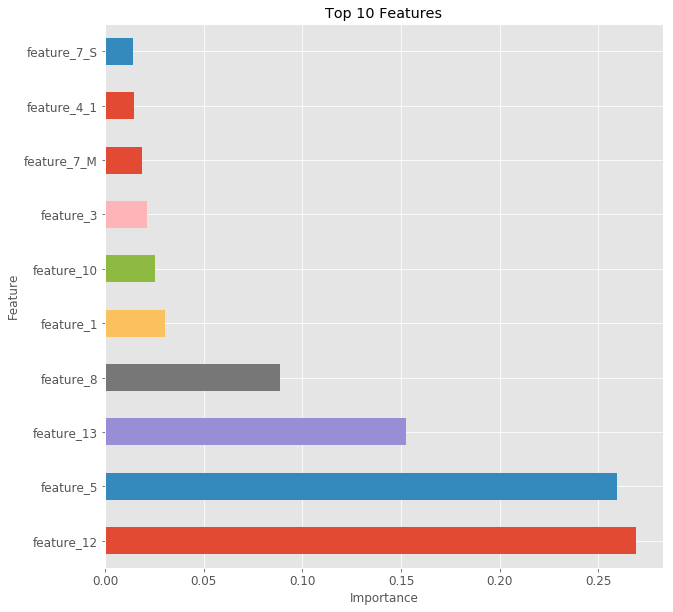

In [270]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use('ggplot')

#Find feature imporatance
feat_importances = pd.Series(rfc.feature_importances_, index=x.columns)
plt.figure(figsize=(10, 10))

feat_importances.nlargest(10).plot(kind='barh')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Top 10 Features')
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show()

### Try deleting missing values from feature 4

In [293]:
df_3 = df_feat

In [294]:
#Remove our imputed value
df_3['feature_4'] = df_3['feature_4'].astype(str)
df_3 = df_3[df_3['feature_4'] != 5]

In [295]:
df_3 = df_3.reset_index(drop=True)

In [297]:
df_3 = pd.get_dummies(df_3, prefix=['feature_4', 'feature_2', 'feature_7', 'feature_9', 'feature_11'])
df_3.head(2)

,label,feature_1,feature_3,feature_5,feature_6,feature_8,feature_10,feature_12,feature_13,feature_4_00,...,feature_9_M,feature_9_S,feature_11_A,feature_11_B,feature_11_C,feature_11_D,feature_11_E,feature_11_F,feature_11_G,feature_11_H
0,1,0,0,505,0,7,1,280,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,0,0,803,1,9,4,275,0,0,...,1,0,0,1,0,0,0,0,0,0


In [298]:
from sklearn.model_selection import train_test_split

x = df_3.drop(['label'], axis=1) #training features
y = df_3['label'] #target

#Need to set our train/test values before resampling
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                  test_size = .15)

In [299]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(x_train, y_train)

print('Training accuracy normal RandomForest is: {}'.format(rfc.score(x_train, y_train)))
print('Test accuracy normal RandomForest is: {}'.format(rfc.score(x_test, y_test)))


y_pred = rfc.predict(x_test) #predict y based on x_test
print(classification_report(y_test, y_pred)) #true value vs predicted value

scores = cross_val_score(rfc, x_train, y_train, cv=5)
print("Cross Val RandomForestClassifier Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training accuracy normal RandomForest is: 0.9787215655396906
Test accuracy normal RandomForest is: 0.716959573426193
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      8606
           1       0.74      0.71      0.73      9773

   micro avg       0.72      0.72      0.72     18379
   macro avg       0.72      0.72      0.72     18379
weighted avg       0.72      0.72      0.72     18379

Cross Val RandomForestClassifier Accuracy: 0.72 (+/- 0.00)


In [300]:
clf = LinearSVC()
clf.fit(x_train, y_train) 

print('Training accuracy LinearSVC is: {}'.format(clf.score(x_train, y_train)))
print('Test accuracy LinearSVC is: {}'.format(clf.score(x_test, y_test)))

y_pred = clf.predict(x_test) #predict y based on x_test
print(classification_report(y_test, y_pred)) #true value vs predicted value

scores = cross_val_score(clf, x_train, y_train, cv=5)
print("Cross Val LinearSVC Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training accuracy LinearSVC is: 0.47172637623268004
Test accuracy LinearSVC is: 0.4682518091299853


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.47      1.00      0.64      8606
           1       0.00      0.00      0.00      9773

   micro avg       0.47      0.47      0.47     18379
   macro avg       0.23      0.50      0.32     18379
weighted avg       0.22      0.47      0.30     18379



/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Cross Val LinearSVC Accuracy: 0.61 (+/- 0.15)


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [301]:
clf1 = ensemble.GradientBoostingClassifier()
clf1.fit(x_train, y_train)

print('Training accuracy normal GradientBoosting is: {}'.format(clf1.score(x_train, y_train)))
print('Test accuracy normal GradientBoosting is: {}'.format(clf1.score(x_test, y_test)))

y_pred = clf1.predict(x_test) #predict y based on x_test
print(classification_report(y_test, y_pred)) #true value vs predicted value

scores = cross_val_score(clf1, x_train, y_train, cv=5)
print("CV Gradient Booster Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Training accuracy normal GradientBoosting is: 0.7617314653889363
Test accuracy normal GradientBoosting is: 0.7610316121660591
              precision    recall  f1-score   support

           0       0.77      0.69      0.73      8606
           1       0.75      0.82      0.78      9773

   micro avg       0.76      0.76      0.76     18379
   macro avg       0.76      0.76      0.76     18379
weighted avg       0.76      0.76      0.76     18379

CV Gradient Booster Accuracy: 0.76 (+/- 0.00)


### No matter what was done with Feature 4 it didn't affect the predictive accuracy in any of our models
Because of this we'll choose a dataframe that doesn't utilize this feature at all for efficiency, feature_2 didn't seem to affect things either while adding a significant amount of complexity. We also notice that out of all our models the Gradient boosting classifier did best each time.

In [341]:
df = df_feat.drop(['feature_4', 'feature_2'], axis=1)

print(df.dtypes)
df.tail()

label          int64
feature_1      int64
feature_3      int64
feature_5      int64
feature_6      int64
feature_7     object
feature_8      int64
feature_9     object
feature_10     int64
feature_11    object
feature_12     int64
feature_13     int64
dtype: object


,label,feature_1,feature_3,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13
122517,0,0,0,515,1,M,3,M,1,F,300,0
122518,0,0,0,807,1,S,9,S,4,B,220,1
122519,0,0,0,602,0,M,9,M,2,A,290,1
122520,0,0,0,501,1,M,9,S,1,B,275,1
122521,0,0,0,691,1,M,7,S,2,D,330,1


In [342]:
df = pd.get_dummies(df, prefix=['feature_7', 'feature_9', 'feature_11'])
df.head(2)

,label,feature_1,feature_3,feature_5,feature_6,feature_8,feature_10,feature_12,feature_13,feature_7_M,...,feature_9_M,feature_9_S,feature_11_A,feature_11_B,feature_11_C,feature_11_D,feature_11_E,feature_11_F,feature_11_G,feature_11_H
0,1,0,0,505,0,7,1,280,0,1,...,1,0,0,0,1,0,0,0,0,0
1,1,0,0,803,1,9,4,275,0,1,...,1,0,0,1,0,0,0,0,0,0


In [343]:
df.dtypes

label           int64
feature_1       int64
feature_3       int64
feature_5       int64
feature_6       int64
feature_8       int64
feature_10      int64
feature_12      int64
feature_13      int64
feature_7_M     uint8
feature_7_S     uint8
feature_9_M     uint8
feature_9_S     uint8
feature_11_A    uint8
feature_11_B    uint8
feature_11_C    uint8
feature_11_D    uint8
feature_11_E    uint8
feature_11_F    uint8
feature_11_G    uint8
feature_11_H    uint8
dtype: object

In [344]:
from sklearn.model_selection import train_test_split

x = df.drop(['label'], axis=1) #training features
y = df['label'] #target

#Need to set our train/test values before resampling
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                  test_size = .15, random_state = 42)

In [345]:
clf1 = ensemble.GradientBoostingClassifier()
clf1.fit(x_train, y_train)

print('Training accuracy normal GradientBoosting is: {}'.format(clf1.score(x_train, y_train)))
print('Test accuracy normal GradientBoosting is: {}'.format(clf1.score(x_test, y_test)))

y_pred = clf1.predict(x_test) #predict y based on x_test
print(classification_report(y_test, y_pred)) #true value vs predicted value

scores = cross_val_score(clf1, x_train, y_train, cv=5)
print("CV Gradient Booster Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Training accuracy normal GradientBoosting is: 0.7582458734624506
Test accuracy normal GradientBoosting is: 0.7512378257794222
              precision    recall  f1-score   support

           0       0.76      0.67      0.71      8469
           1       0.74      0.82      0.78      9910

   micro avg       0.75      0.75      0.75     18379
   macro avg       0.75      0.75      0.75     18379
weighted avg       0.75      0.75      0.75     18379

CV Gradient Booster Accuracy: 0.76 (+/- 0.00)


In [346]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(x_train, y_train)

print('Training accuracy normal RandomForest is: {}'.format(rfc.score(x_train, y_train)))
print('Test accuracy normal RandomForest is: {}'.format(rfc.score(x_test, y_test)))


y_pred = rfc.predict(x_test) #predict y based on x_test
print(classification_report(y_test, y_pred)) #true value vs predicted value

scores = cross_val_score(rfc, x_train, y_train, cv=5)
print("Cross Val RandomForestClassifier Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training accuracy normal RandomForest is: 0.9336105163093055
Test accuracy normal RandomForest is: 0.7104847924261385
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      8469
           1       0.74      0.72      0.73      9910

   micro avg       0.71      0.71      0.71     18379
   macro avg       0.71      0.71      0.71     18379
weighted avg       0.71      0.71      0.71     18379

Cross Val RandomForestClassifier Accuracy: 0.71 (+/- 0.00)


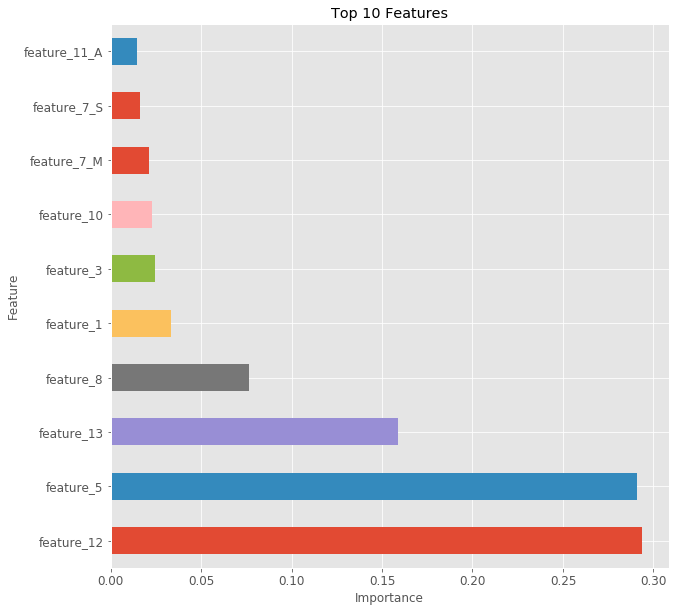

In [347]:
feat_importances = pd.Series(rfc.feature_importances_, index=x.columns)
plt.figure(figsize=(10, 10))

feat_importances.nlargest(10).plot(kind='barh')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Top 10 Features')
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show()

#### We can see the most important features
Features 12 and 5 were our numerical features. Let's try dropping the outliers based on z-score from 12 to see if this gives us better predictive accuracy. (Feature 5 actually doesn't have any values outside of 3 standard deviations)

In [350]:
from scipy import stats

z = np.abs(stats.zscore(df_feat.feature_12))
# get indices of outliers
outliers = list(np.where(z > 3)[0])
# drop them
df_clean = df_feat.drop(outliers)

In [351]:
df_clean.feature_12.describe()

count    122223.000000
mean        239.917732
std          63.716581
min          90.000000
25%         200.000000
50%         245.000000
75%         280.000000
max         430.000000
Name: feature_12, dtype: float64

In [352]:
df_feat.feature_12.describe()

count    122522.000000
mean        240.447756
std          64.541207
min          90.000000
25%         200.000000
50%         245.000000
75%         280.000000
max         495.000000
Name: feature_12, dtype: float64

In [365]:
df_c = df_clean.drop(['feature_2', 'feature_4'], axis = 1)
df_c = df_c.reset_index(drop=True)

In [368]:
df_c.tail()

,label,feature_1,feature_3,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13
122218,0,0,0,515,1,M,3,M,1,F,300,0
122219,0,0,0,807,1,S,9,S,4,B,220,1
122220,0,0,0,602,0,M,9,M,2,A,290,1
122221,0,0,0,501,1,M,9,S,1,B,275,1
122222,0,0,0,691,1,M,7,S,2,D,330,1


In [369]:
df_c = pd.get_dummies(df_c, prefix=['feature_7', 'feature_9', 'feature_11'])

x = df_c.drop(['label'], axis=1) #training features
y = df_c['label'] #target

#Set our train/test values
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                  test_size = .15, random_state = 42)

clf1 = ensemble.GradientBoostingClassifier()
clf1.fit(x_train, y_train)

print('Training accuracy normal GradientBoosting is: {}'.format(clf1.score(x_train, y_train)))
print('Test accuracy normal GradientBoosting is: {}'.format(clf1.score(x_test, y_test)))

y_pred = clf1.predict(x_test) #predict y based on x_test
print(classification_report(y_test, y_pred)) #true value vs predicted value

scores = cross_val_score(clf1, x_train, y_train, cv=5)
print("CV Gradient Booster Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Training accuracy normal GradientBoosting is: 0.7579435743918991
Test accuracy normal GradientBoosting is: 0.7522090105814334
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      8547
           1       0.74      0.82      0.78      9787

   micro avg       0.75      0.75      0.75     18334
   macro avg       0.75      0.75      0.75     18334
weighted avg       0.75      0.75      0.75     18334

CV Gradient Booster Accuracy: 0.76 (+/- 0.01)


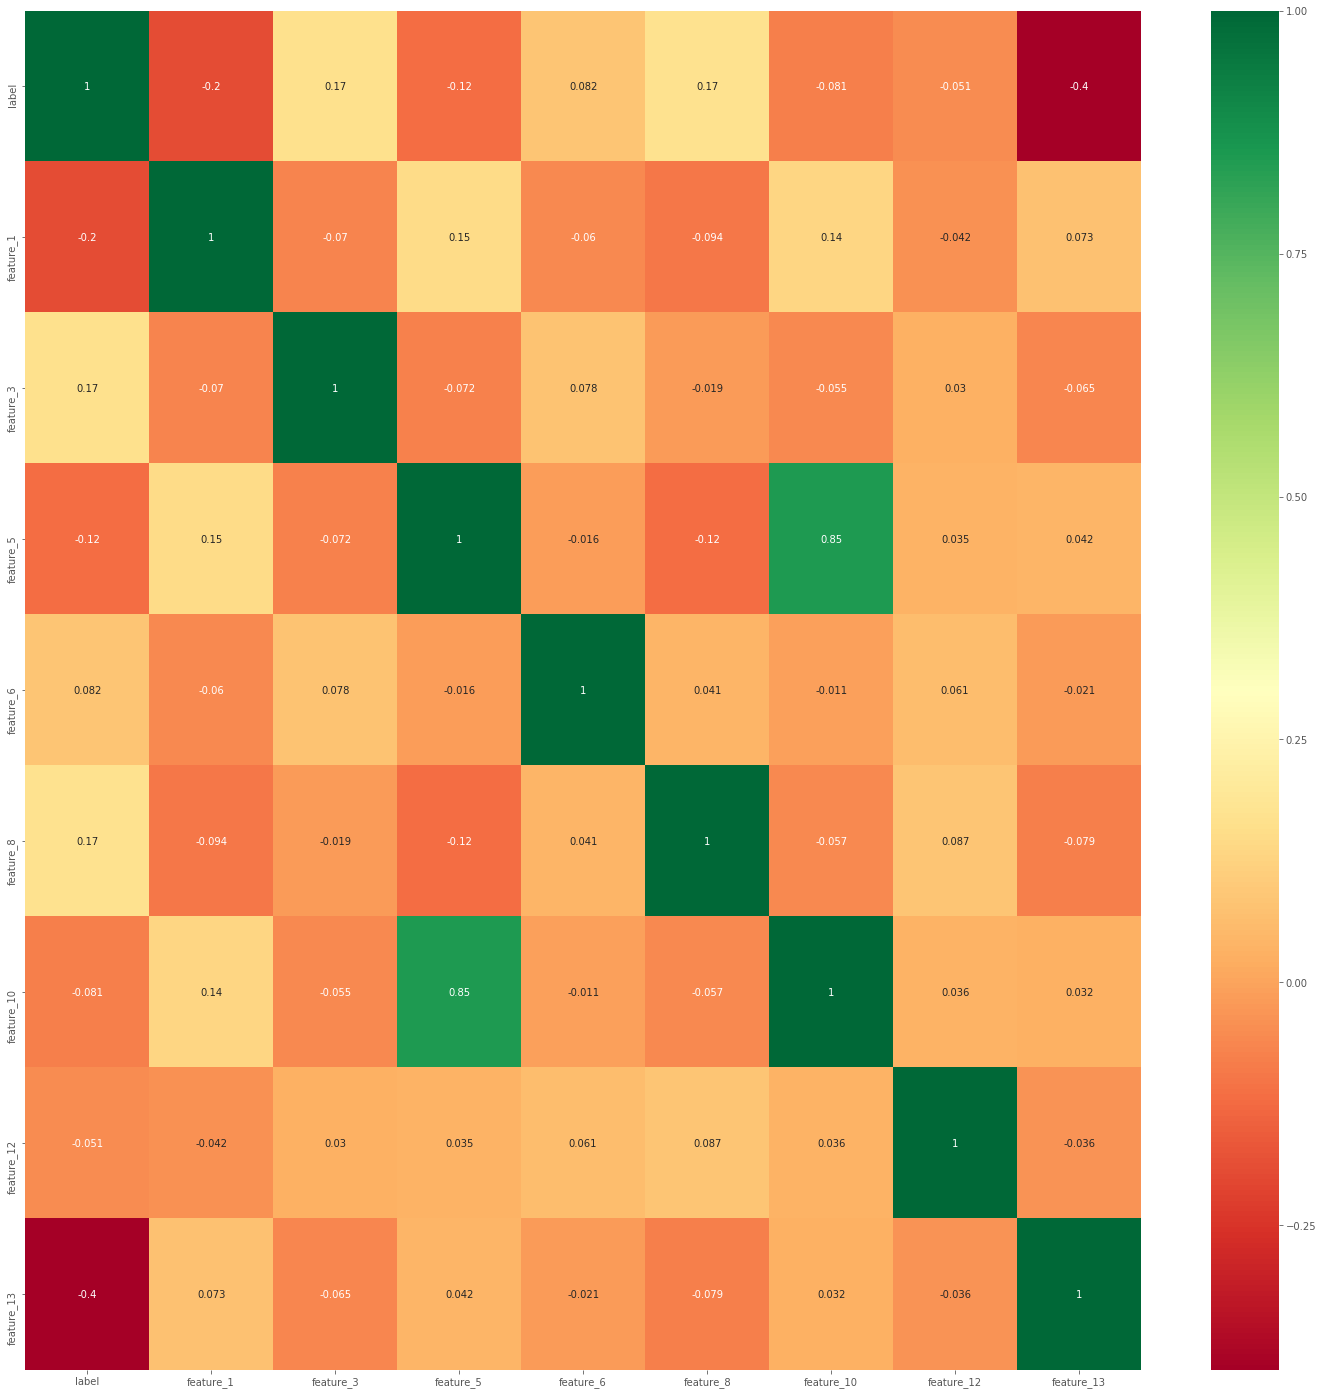

In [372]:
import seaborn as sns

plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(df_feat.corr(),annot=True,cmap="RdYlGn")